In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from glob import glob
import math

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly.express as px

import keras

import os # used for navigating to image path
import imageio # used for writing images

import datetime

from PIL import Image
from PIL import ImageFile

##not sure why I need this but I do
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_images = np.load('/content/drive/MyDrive/Dog Breed Classification/raw_data/train_images.npy')
train_labels = np.load('/content/drive/MyDrive/Dog Breed Classification/raw_data/train_labels.npy')

test_images = np.load('/content/drive/MyDrive/Dog Breed Classification/raw_data/test_images.npy')
test_labels = np.load('/content/drive/MyDrive/Dog Breed Classification/raw_data/test_labels.npy')

test_df = pd.read_csv('/content/drive/MyDrive/Dog Breed Classification/raw_data/test_df.csv')

print("Shape of train image dataset: {}".format(train_images.shape))
print("Shape of test image dataset: {}".format(test_images.shape))
print("Shape of train label dataset: {}".format(train_labels.shape))
print("Shape of test label dataset: {}".format(test_labels.shape))

Shape of train image dataset: (8981, 224, 224, 3)
Shape of test image dataset: (2245, 224, 224, 3)
Shape of train label dataset: (8981, 59)
Shape of test label dataset: (2245, 59)


## Custom-built CNN model

This is a custom-built CNN model

In [10]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# Initialize the model object
benchmark_model = Sequential()

# Add a convolutional layer
benchmark_model.add(Conv2D(filters = 16, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu',
                 input_shape=(224, 224, 3)))

benchmark_model.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
benchmark_model.add(Conv2D(filters = 32, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

benchmark_model.add(MaxPooling2D(pool_size = 2))

benchmark_model.add(Dropout(0.2))

benchmark_model.add(GlobalAveragePooling2D())

benchmark_model.add(Dense(59, activation='softmax'))

# Compile the model
benchmark_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

benchmark_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 59)               

In [11]:
training = benchmark_model.fit(train_images, train_labels,
           batch_size = 50,
           epochs = 15,
           validation_split=0.2,
           )

Epoch 1/15
144/144 [==============================] - 5s 33ms/step - loss: 19.7498 - accuracy: 0.0200 - val_loss: 4.0806 - val_accuracy: 0.0211
Epoch 2/15
144/144 [==============================] - 4s 31ms/step - loss: 4.0762 - accuracy: 0.0244 - val_loss: 4.0789 - val_accuracy: 0.0178
Epoch 3/15
144/144 [==============================] - 4s 31ms/step - loss: 4.0710 - accuracy: 0.0204 - val_loss: 4.0760 - val_accuracy: 0.0211
Epoch 4/15
144/144 [==============================] - 4s 31ms/step - loss: 4.0682 - accuracy: 0.0234 - val_loss: 4.0747 - val_accuracy: 0.0245
Epoch 5/15
144/144 [==============================] - 4s 31ms/step - loss: 4.0567 - accuracy: 0.0295 - val_loss: 4.0716 - val_accuracy: 0.0178
Epoch 6/15
144/144 [==============================] - 4s 31ms/step - loss: 4.0533 - accuracy: 0.0227 - val_loss: 4.0574 - val_accuracy: 0.0334
Epoch 7/15
144/144 [==============================] - 4s 31ms/step - loss: 4.0421 - accuracy: 0.0307 - val_loss: 4.0523 - val_accuracy: 0.028

In [12]:
# Import the necessary components from Keras
from keras.layers import MaxPooling2D, Dropout, GlobalAveragePooling2D, BatchNormalization


# Initialize the model object
model2 = Sequential()

# Add a convolutional layer
model2.add(Conv2D(filters = 16, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu',
                 input_shape=(224, 224, 3)))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model2.add(Conv2D(filters = 32, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model2.add(Conv2D(filters = 64, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 2))

# Add a convolutional layer
model2.add(Conv2D(filters = 128, kernel_size=3, strides = 1,
                 padding = 'same', activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size = 4))

model2.add(Dropout(0.2))

model2.add(GlobalAveragePooling2D())

model2.add(Dense(59, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 64)       

In [13]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

training = model2.fit(train_images, train_labels,
          batch_size = 50,
          epochs = 30,
          validation_split=0.2,
          callbacks = [early_stopping_monitor]
          )

Epoch 1/30
144/144 [==============================] - 10s 57ms/step - loss: 4.2952 - accuracy: 0.0288 - val_loss: 4.1420 - val_accuracy: 0.0334
Epoch 2/30
144/144 [==============================] - 8s 54ms/step - loss: 3.9485 - accuracy: 0.0527 - val_loss: 4.1039 - val_accuracy: 0.0390
Epoch 3/30
144/144 [==============================] - 8s 54ms/step - loss: 3.8312 - accuracy: 0.0731 - val_loss: 3.8969 - val_accuracy: 0.0545
Epoch 4/30
144/144 [==============================] - 8s 54ms/step - loss: 3.7001 - accuracy: 0.0940 - val_loss: 4.3817 - val_accuracy: 0.0568
Epoch 5/30
144/144 [==============================] - 8s 54ms/step - loss: 3.5796 - accuracy: 0.1154 - val_loss: 3.9180 - val_accuracy: 0.0490
Epoch 6/30
144/144 [==============================] - 8s 54ms/step - loss: 3.4128 - accuracy: 0.1512 - val_loss: 3.6443 - val_accuracy: 0.1002
Epoch 7/30
144/144 [==============================] - 8s 54ms/step - loss: 3.2135 - accuracy: 0.1717 - val_loss: 3.5135 - val_accuracy: 0.110

In [14]:
training_history_df = pd.DataFrame(training.history)
training_history_df = training_history_df.reset_index().rename(columns = {'index':'epoch'})

training_history_df.loc[:,('epoch')] = [epoch+1 for epoch in training_history_df['epoch']]
training_history_df

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,4.120932,0.034800,4.141954,0.033389
1,2,3.928614,0.052756,4.103938,0.038954
2,3,3.814764,0.078369,3.896911,0.054535
3,4,3.690879,0.094933,4.381652,0.056761
4,5,3.556292,0.120128,3.918045,0.048971
5,6,3.385653,0.154788,3.644290,0.100167
6,7,3.208677,0.178870,3.513505,0.110184
7,8,3.063331,0.211303,3.455977,0.148024
8,9,2.894655,0.245128,3.301786,0.165832
9,10,2.755295,0.276030,3.227085,0.165832


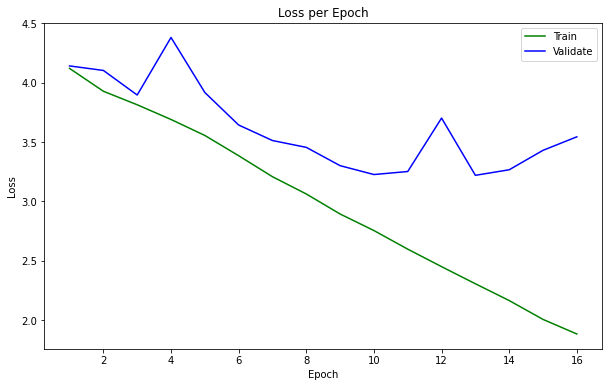

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()

plt.plot(list(range(1,17)), training.history['loss'], color='green', label="Train")
plt.plot(list(range(1,17)), training.history['val_loss'], color='blue', label="Validate")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")

plt.legend(loc='best')
plt.show()

In [16]:
## original model result
model2.evaluate(test_images, test_labels)

71/71 [==============================] - 1s 12ms/step - loss: 3.4496 - accuracy: 0.1755


[3.4495813846588135, 0.17550110816955566]

In [ ]:
len(label_df[label_df['breed_label'] == label_df['pred_labels']])/len(label_df)

0.1977728285077951

## Transfer Learning with VGG16

In [18]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

# load model without classifier layers
vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_model.layers:
	layer.trainable = False

# add new classifier layers
flat1 = Flatten()(vgg16_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(59, activation='softmax')(class1)
# define new model
vgg16_model = Model(inputs=vgg16_model.inputs, outputs=output)

# Compile the model
vgg16_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# summarize
vgg16_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [19]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 3)

training = vgg16_model.fit(train_images, train_labels,
          batch_size = 50,
          epochs = 30,
          validation_split=0.2,
          callbacks = [early_stopping_monitor]
          )

Epoch 1/30
144/144 [==============================] - 61s 359ms/step - loss: 69.4765 - accuracy: 0.1345 - val_loss: 3.5243 - val_accuracy: 0.1703
Epoch 2/30
144/144 [==============================] - 38s 266ms/step - loss: 2.6984 - accuracy: 0.3268 - val_loss: 3.4437 - val_accuracy: 0.2593
Epoch 3/30
144/144 [==============================] - 39s 271ms/step - loss: 1.7665 - accuracy: 0.5470 - val_loss: 3.3822 - val_accuracy: 0.3166
Epoch 4/30
144/144 [==============================] - 40s 276ms/step - loss: 1.2149 - accuracy: 0.6766 - val_loss: 3.5033 - val_accuracy: 0.3723
Epoch 5/30
144/144 [==============================] - 40s 276ms/step - loss: 0.8954 - accuracy: 0.7557 - val_loss: 3.4925 - val_accuracy: 0.3901
Epoch 6/30
144/144 [==============================] - 40s 277ms/step - loss: 0.6763 - accuracy: 0.8221 - val_loss: 4.0095 - val_accuracy: 0.3740


In [22]:
## original model result
vgg16_model.evaluate(test_images, test_labels)

71/71 [==============================] - 8s 118ms/step - loss: 4.0363 - accuracy: 0.3586


[4.036268711090088, 0.35857459902763367]

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(vgg16_model, '/content/drive/MyDrive/Dog Breed Classification/vgg16_model_assets/breeds_trained_model.h5')